## Detect Faces in Photographs

Face detection is a computer vision problem that involves finding faces in photos.

- Face detection is a non-trivial computer vision problem for identifying and localizing faces in images.
- Face detection can be performed using the classical feature-based cascade classifier using the OpenCV.
- State-of-the-art face detection can be achieved using a Multi-task Cascade CNN (MTCNN).

### Face Detection

Face detection is a problem in computer vision of locating and localizing one or more faces in a photograph. Locating a face in a photograph refers to finding the coordinates of the face in the image, whereas localization refers to demarcating the extent of the face, often via a bounding box around the face.


In [5]:
!wget https://machinelearningmastery.com/wp-content/uploads/2019/03/test1.jpg
!wget https://machinelearningmastery.com/wp-content/uploads/2019/03/test2.jpg
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-04-12 23:06:51--  https://machinelearningmastery.com/wp-content/uploads/2019/03/test1.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142525 (139K) [image/jpeg]
Saving to: ‘test1.jpg.1’

test1.jpg.1         100%[===================>] 139.18K  --.-KB/s    in 0.002s  

2019-04-12 23:06:51 (82.5 MB/s) - ‘test1.jpg.1’ saved [142525/142525]

--2019-04-12 23:06:52--  https://machinelearningmastery.com/wp-content/uploads/2019/03/test2.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152282 (149K) [image/jpeg]
Saving to: ‘test2.jpg.1’

test2.jpg.1         100%[===================>] 148.71K  --.-KB/s  

In [3]:
pip install opencv-python

In [4]:
# check opencv version
import cv2
# print version number
print(cv2.__version__)

3.4.3


In [0]:
# detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
# load the photograph
pixels = imread('test1.jpg')

In [0]:
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

In [0]:
# perform face detection
bboxes = classifier.detectMultiScale(pixels)

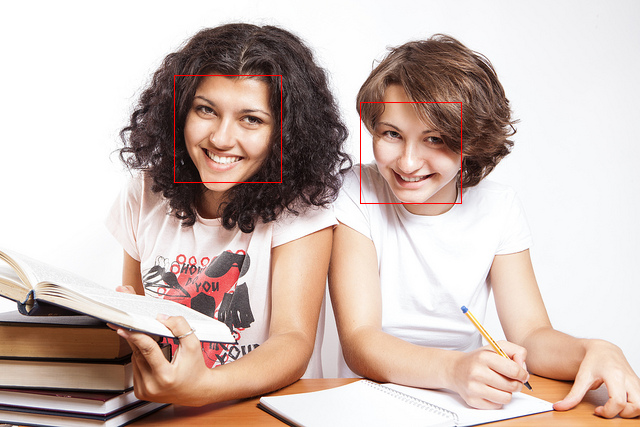

In [14]:
# print bounding box for each detected face
for box in bboxes:
# extract
  x, y, width, height = box
  x2, y2 = x + width, y + height
  
  # draw a rectangle over the pixels
  rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
  
# show the image
#imshow('face detection', pixels)
cv2_imshow(pixels)

In [0]:
# keep the window open until we press a key 
waitKey(0)

# close the window
destroyAllWindows()

Second photograph of the swim team.

In [0]:
# load the photograph
pixels = imread('test2.jpg')

In [0]:
# perform face detection
bboxes = classifier.detectMultiScale(pixels, scaleFactor=1.1, minNeighbors=3)

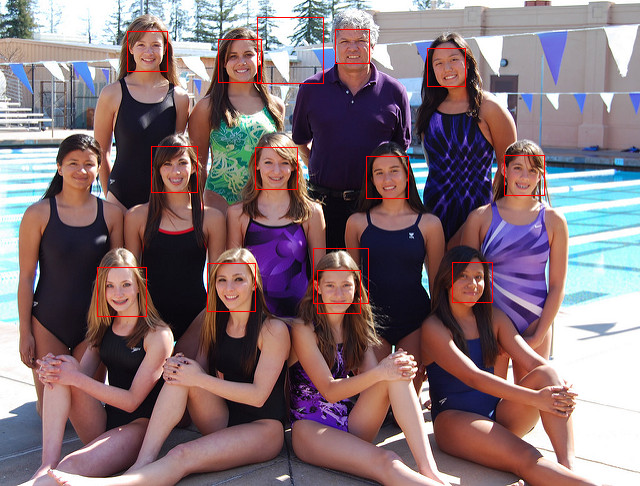

In [18]:
# print bounding box for each detected face
for box in bboxes:
  # extract
  x, y, width, height = box
  x2, y2 = x + width, y + height
  
  # draw a rectangle over the pixels
  rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
  
# show the image
#imshow('face detection', pixels)
cv2_imshow(pixels)

Apply scale factor and minimum neighbors tunning. The scaleFactor controls how the input image is scaled prior to detection, e.g. is it scaled up or down, which can help to better find the faces in the image. The minNeighbors determines how robust each detection must be in order to be reported, e.g. the number of candidate rectangles that found the face. 

In [0]:
# perform face detection
bboxes = classifier.detectMultiScale(pixels, scaleFactor=1.05, minNeighbors=8)

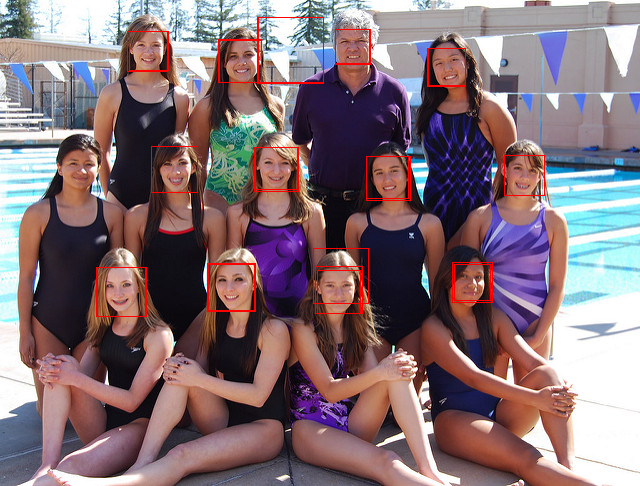

In [20]:
# print bounding box for each detected face
for box in bboxes:
  # extract
  x, y, width, height = box
  x2, y2 = x + width, y + height
  
  # draw a rectangle over the pixels
  rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
  
# show the image
#imshow('face detection', pixels)
cv2_imshow(pixels)

## Face Detection With Deep Learning

We will use Multi-Task Cascaded Convolutional Neural Network approach, which is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

The network uses a cascade structure with three networks; 
- First the image is rescaled to a range of different sizes (called an image pyramid).
- The first model **Proposal Network** or P-Net proposes candidate facial regions (shallow CNN).
- The second model **Refine Network** or R-Net filters the bounding boxes (more complex CNN).
- The third model **Output Network** or O-Net proposes facial landmarks (more powerful CNN).


The model is called a multi-task network because each of the three models in the cascade (P-Net, R-Net and O-Net) are trained on three tasks, e.g. make three types of predictions; they are: face classification, bounding box regression, and facial landmark localization.

In [21]:
!pip install mtcnn

    100% |████████████████████████████████| 2.3MB 9.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/be/dd/12/bccde6b95f576af24256f6f1a2e4087eb8488405a6c107e13c
Successfully built mtcnn


In [23]:
!pip show mtcnn

Name: mtcnn
Version: 0.0.8
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: 


In [24]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.0.8


In [0]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

In [0]:
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)

In [28]:
# create the detector, using default weights 
detector = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [0]:
# detect faces in the image
faces = detector.detect_faces(pixels)

The example loads the photograph, loads the model, performs face detection, and prints a list of each face detected.

In [30]:
for face in faces:
  print(face)

{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


In [0]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  # plot each box  
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = Rectangle((x, y), width, height, fill=False, color='red') 
    # draw the box
    ax.add_patch(rect)
    # draw the dots
    for _, value in result['keypoints'].items():
      # create and draw dot
      dot = Circle(value, radius=2, color='red')
      ax.add_patch(dot)
  # show the plot
  pyplot.show()

Running the example plots the photograph then draws a bounding box for each of the detected faces. We can see that both faces were detected correctly.

Plots the photograph again with bounding boxes and facial key points. We can see that eyes, nose, and mouth are detected well on each face, although the mouth on the right face could be better detected, with the points looking a little lower than the corners of the mouth.

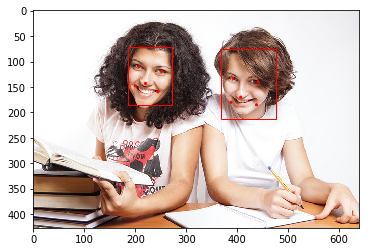

In [39]:
# display faces on the original image 
draw_image_with_boxes(filename, faces)

Detection on the swim team photograph, we can see that all thirteen faces were correctly detected and that it looks roughly like all of the facial keypoints are also correct.

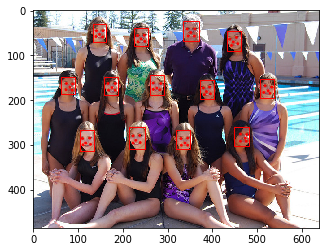

In [47]:
# display faces on the original image 
draw_image_with_boxes('test2.jpg', faces)

Next example creates a plot that shows each separate face detected in the photograph of the swim team.

In [0]:
# draw each face separately
def draw_faces(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot each face as a subplot
  for i in range(len(result_list)):
    # get coordinates
    x1, y1, width, height = result_list[i]['box'] 
    x2, y2 = x1 + width, y1 + height
    # define subplot
    pyplot.subplot(1, len(result_list), i+1) 
    pyplot.axis('off')
    # plot face
    pyplot.imshow(data[y1:y2, x1:x2])
  # show the plot
  pyplot.show()

In [0]:
# load image from file
filename = 'test2.jpg'
pixels = pyplot.imread(filename)

In [0]:
# create the detector, using default weights 
detector = MTCNN()

In [0]:
# detect faces in the image
faces = detector.detect_faces(pixels)

Plot of Each Separate Face Detected in a Photograph of a Swim Team

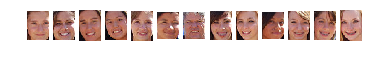

In [45]:
# display faces on the original image 
draw_faces(filename, faces)